Interval de credibilitate 95% pentru μ: (579.4194517602682, 579.4217070808904)
Interval de credibilitate 95% pentru σ: (5.701658889749153e-05, 0.004078027033973971)


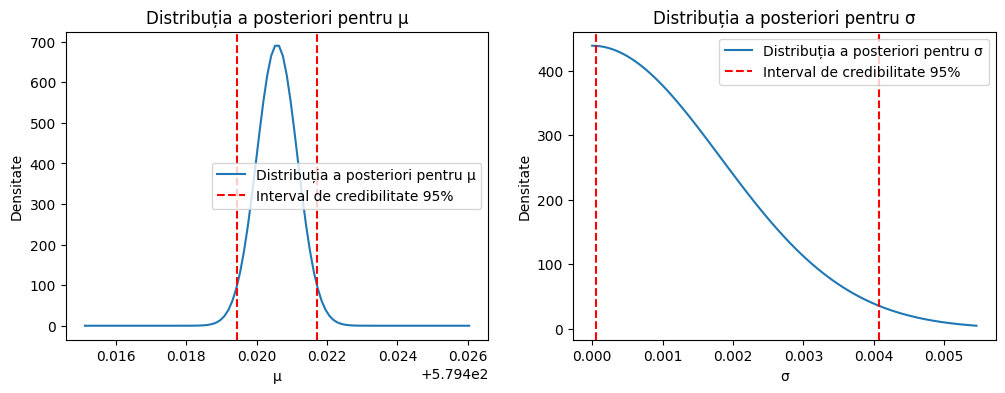

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, halfnorm

# Datele măsurate
data = np.array([56, 60, 58, 55, 57, 59, 61, 56, 58, 60])

# Distribuția a priori pentru media μ
mu_prior = 0
sigma_prior = 100  # Deviația standard a priorului pentru μ

# Distribuția a priori pentru deviația standard σ
sigma_prior_shape = 10  # Parametrul a priorului HalfNormal pentru σ

# Calculăm posteriorii pentru μ și σ
n = len(data)
mu_posterior = (data.sum() / n + mu_prior / (sigma_prior ** 2)) / (1 / n + 1 / (sigma_prior ** 2))
sigma_posterior = np.sqrt(1 / (1 / (n - 1) * np.sum((data - mu_posterior) ** 2) + 1 / (sigma_prior_shape ** 2)))

# Calculăm intervalele de credibilitate 95%
mu_hdi_95 = norm.interval(0.95, loc=mu_posterior, scale=sigma_posterior / np.sqrt(n))
sigma_hdi_95 = halfnorm.interval(0.95, scale=sigma_posterior)

print(f"Interval de credibilitate 95% pentru μ: {mu_hdi_95}")
print(f"Interval de credibilitate 95% pentru σ: {sigma_hdi_95}")

# Vizualizăm rezultatele
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Graficul pentru media μ
x = np.linspace(mu_posterior - 3 * sigma_posterior, mu_posterior + 3 * sigma_posterior, 100)
ax1.plot(x, norm.pdf(x, loc=mu_posterior, scale=sigma_posterior / np.sqrt(n)), label='Distribuția a posteriori pentru μ')
ax1.axvline(mu_hdi_95[0], color='r', linestyle='--', label='Interval de credibilitate 95%')
ax1.axvline(mu_hdi_95[1], color='r', linestyle='--')
ax1.set_title('Distribuția a posteriori pentru μ')
ax1.set_xlabel('μ')
ax1.set_ylabel('Densitate')
ax1.legend()

# Graficul pentru deviația standard σ
x = np.linspace(0, sigma_posterior * 3, 100)
ax2.plot(x, halfnorm.pdf(x, scale=sigma_posterior), label='Distribuția a posteriori pentru σ')
ax2.axvline(sigma_hdi_95[0], color='r', linestyle='--', label='Interval de credibilitate 95%')
ax2.axvline(sigma_hdi_95[1], color='r', linestyle='--')
ax2.set_title('Distribuția a posteriori pentru σ')
ax2.set_xlabel('σ')
ax2.set_ylabel('Densitate')
ax2.legend()

plt.show()